In [251]:


from IDT_.idt_algo import IDT
from IDT_.ihmm_algo.ihmm import IHMM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 



In [252]:
testperson = 14

In [253]:
warnings.filterwarnings('ignore') 
gaze = pd.read_csv("../eye_tracking_expiriment\data\gaze_data_Alexander_14.csv")
gaze.head(10)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.276941,1,1,-64.778465,96.119804,684.325623,-2.911061,101.302765,688.193542,0.633521,...,3.627686,3.704987,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Immersive
1,0.286698,1,1,-64.664429,96.151085,684.360657,-2.758001,101.273628,688.227844,0.633275,...,3.627258,3.693405,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Immersive
2,0.298126,1,1,-64.535042,96.218887,684.392700,-2.641781,101.259789,688.251831,0.632998,...,3.628769,3.690964,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Immersive
3,0.308100,1,1,-64.262329,96.411781,684.392639,-2.419836,101.336929,688.223694,0.632425,...,3.628464,3.688705,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Immersive
4,0.320096,1,1,-64.160805,96.501091,684.368713,-2.332475,101.415237,688.176636,0.632216,...,3.631256,3.689575,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Immersive
5,0.331440,1,1,-64.051567,96.618904,684.366150,-2.239536,101.504433,688.156311,0.631986,...,3.632187,3.693359,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Immersive
6,0.341543,1,1,-63.800228,96.811493,684.303162,-2.078661,101.649460,688.063660,0.631470,...,3.642609,3.695145,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Immersive
7,0.353166,1,1,-63.704269,96.859955,684.246460,-1.976816,101.666275,687.983276,0.631280,...,3.647751,3.698349,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Immersive
8,0.364646,1,1,-63.615246,96.878761,684.127380,-1.883088,101.656662,687.848511,0.631117,...,3.650284,3.692520,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Immersive
9,0.375275,1,1,-63.482147,96.863960,683.766418,-1.774966,101.603943,687.498108,0.630908,...,3.647659,3.690857,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Immersive


In [254]:
gaze = gaze.dropna()
gaze.reset_index(drop=True, inplace=True)
gaze.shape

(192562, 39)

In [255]:
un = gaze["text_file"].unique()
un

array(['AI_HC_P03_text.txt', 'AI_HC_P03_MCQ.txt', 'AI_HC_P03_FIBQ.txt',
       'OR_HC_P03_text.txt', 'OR_HC_P03_MCQ.txt', 'OR_HC_P03_FIBQ.txt',
       'AI_SK_P03_text.txt', 'AI_SK_P03_MCQ.txt', 'AI_SK_P03_FIBQ.txt',
       'OR_SK_P03_text.txt', 'OR_SK_P03_MCQ.txt', 'OR_SK_P03_FIBQ.txt',
       'AI_KB_P03_text.txt', 'AI_KB_P03_MCQ.txt', 'AI_KB_P03_FIBQ.txt',
       'OR_KB_P03_text.txt', 'OR_KB_P03_MCQ.txt', 'OR_KB_P03_FIBQ.txt'],
      dtype=object)

In [256]:
im_HC_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[0])]
im_HC_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[3])]
im_SK_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[6])]
im_SK_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[9])]
im_KB_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[12])]
im_KB_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[15])]
im_HC_AI.reset_index(drop=True, inplace=True) 
im_HC_OR.reset_index(drop=True, inplace=True) 
im_SK_AI.reset_index(drop=True, inplace=True) 
im_SK_OR.reset_index(drop=True, inplace=True) 
im_KB_AI.reset_index(drop=True, inplace=True) 
im_KB_OR.reset_index(drop=True, inplace=True) 
im_HC_AI["device_time_stamp"] = im_HC_AI["device_time_stamp"] - im_HC_AI["device_time_stamp"][0]
im_HC_OR["device_time_stamp"] = im_HC_OR["device_time_stamp"] - im_HC_OR["device_time_stamp"][0]
im_SK_AI["device_time_stamp"] = im_SK_AI["device_time_stamp"] - im_SK_AI["device_time_stamp"][0]
im_SK_OR["device_time_stamp"] = im_SK_OR["device_time_stamp"] - im_SK_OR["device_time_stamp"][0]
im_KB_AI["device_time_stamp"] = im_KB_AI["device_time_stamp"] - im_KB_AI["device_time_stamp"][0]
im_KB_OR["device_time_stamp"] = im_KB_OR["device_time_stamp"] - im_KB_OR["device_time_stamp"][0]
im_SK_OR.head(5)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.000000,1,1,-117.708893,100.485054,672.590515,-59.544476,109.804268,680.057434,0.748241,...,4.062042,4.256912,True,OR_SK_P03_text.txt,3.0,22.0,Arial,SK,False,Immersive
1,0.011144,1,1,-117.708893,100.485054,672.590515,-59.033436,109.870354,679.758667,0.748241,...,4.062042,4.235031,True,OR_SK_P03_text.txt,3.0,22.0,Arial,SK,False,Immersive
2,0.023302,1,1,-117.098549,100.584770,672.105530,-58.367054,109.942284,679.415649,0.747120,...,4.063568,4.211792,True,OR_SK_P03_text.txt,3.0,22.0,Arial,SK,False,Immersive
3,0.033598,1,1,-115.218895,100.844910,670.199097,-56.866341,110.010941,678.296082,0.743808,...,4.034882,4.187912,True,OR_SK_P03_text.txt,3.0,22.0,Arial,SK,False,Immersive
4,0.044638,1,1,-115.218895,100.844910,670.199097,-56.451401,110.128662,678.524902,0.743808,...,4.034882,4.184158,True,OR_SK_P03_text.txt,3.0,22.0,Arial,SK,False,Immersive


In [257]:
left_x = im_SK_OR['left_gaze_point_on_display_area_x']*2560
left_y = im_SK_OR['left_gaze_point_on_display_area_y']*1440
right_x = im_SK_OR['right_gaze_point_on_display_area_x']*2560
right_y = im_SK_OR['right_gaze_point_on_display_area_y']*1440
t = im_SK_OR['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,1088.193130,1105.863647,391.374078,412.960753
1,0.011144,1094.578323,1105.863647,411.303406,412.960753
2,0.023302,1093.459778,1078.075333,412.869987,433.171906
3,0.033598,1084.684067,1090.242233,422.277031,446.533470
4,0.044638,1093.063660,1090.242233,420.695343,446.533470
...,...,...,...,...,...
25363,285.791179,1799.071503,1763.125153,1149.216013,1163.414125
25364,285.801136,1845.488892,1815.956116,1214.721565,1215.846376
25365,285.813406,1852.685394,1830.218201,1204.529858,1232.173262
25366,285.824122,1871.030426,1854.096069,1224.450388,1240.158691


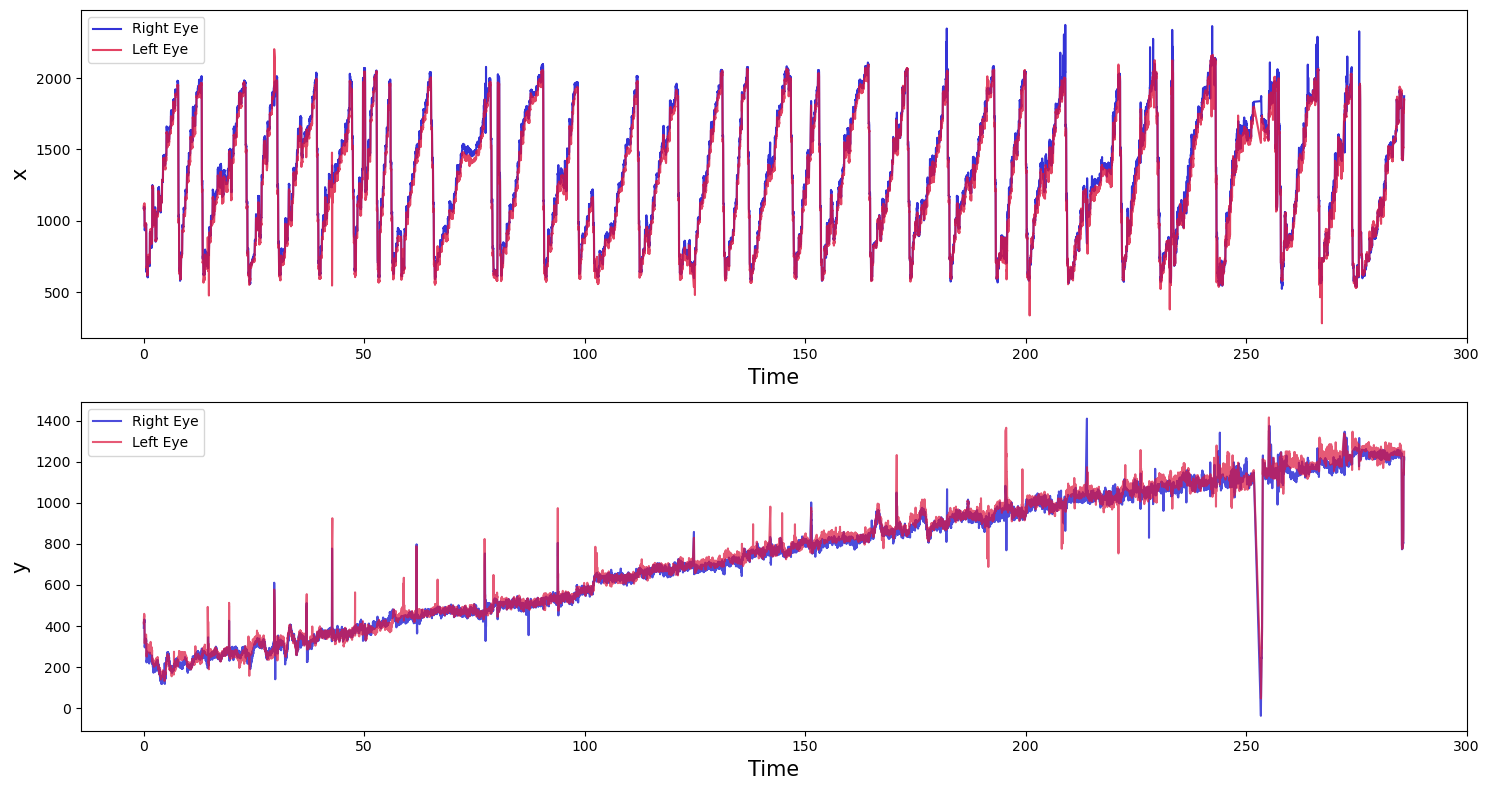

In [258]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()

In [259]:
last = gaze["Label"][0]
textfiles = [un[0], un[3],un[6] ,un[9] ,un[12], un[15]]
changes = []
skimming_parts = []
index = 0

for i, j in zip(gaze["Label"], gaze["text_file"]):
    if i != "Immersive" and j in textfiles:
        
        changes.append(gaze.loc[index])
        
    elif len(changes) > 0:
        
        skimming_parts.append(changes)
        changes = []
   
    index = index + 1


In [260]:
for i in range(len(skimming_parts)):
    skimming_parts[i] = pd.DataFrame(skimming_parts[i])
    skimming_parts[i].reset_index(drop=True, inplace=True)
    skimming_parts[i]["device_time_stamp"] = skimming_parts[i]["device_time_stamp"] - skimming_parts[i]["device_time_stamp"][0]
     

In [261]:
imerserive_parts = [im_HC_AI ,
im_HC_OR ,
im_SK_AI ,
im_SK_OR ,
im_KB_AI ,
im_KB_OR ]

In [262]:
part = 9
left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
t = skimming_parts[part]['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,866.859360,893.710175,188.438487,218.505857
1,0.011451,868.448944,894.784698,189.188755,226.394470
2,0.022724,868.118820,901.364212,186.200516,227.168040
3,0.033984,862.809677,894.421310,182.568955,230.070105
4,0.044441,860.511780,893.850327,178.672049,222.323906
...,...,...,...,...,...
244,2.708978,1537.920074,1520.091095,217.691560,207.164662
245,2.720831,1566.652374,1525.940094,227.022257,204.961774
246,2.731870,1555.997162,1530.159760,224.992211,209.885452
247,2.743126,1549.573364,1521.267242,224.657536,211.407444


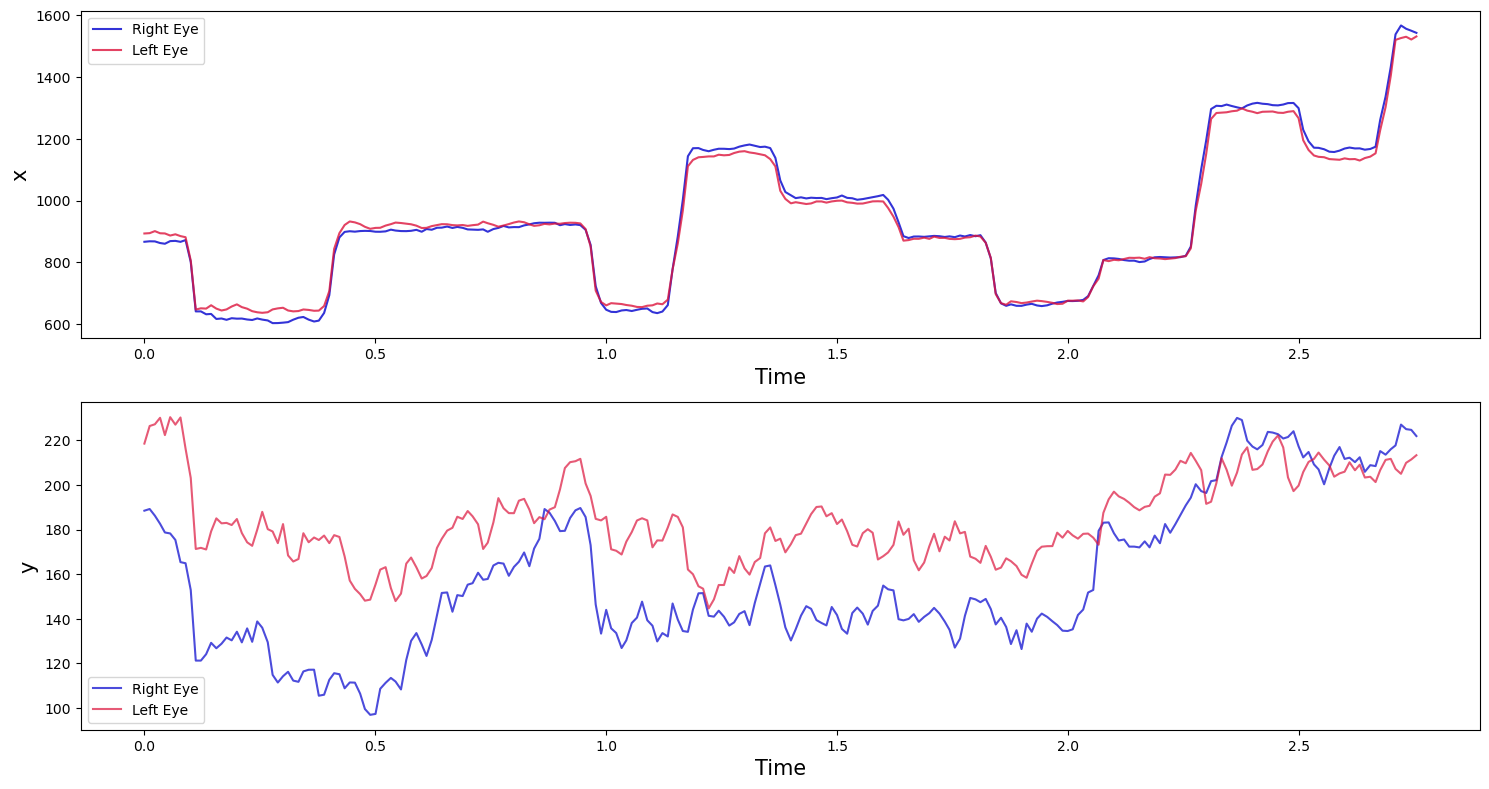

In [263]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()


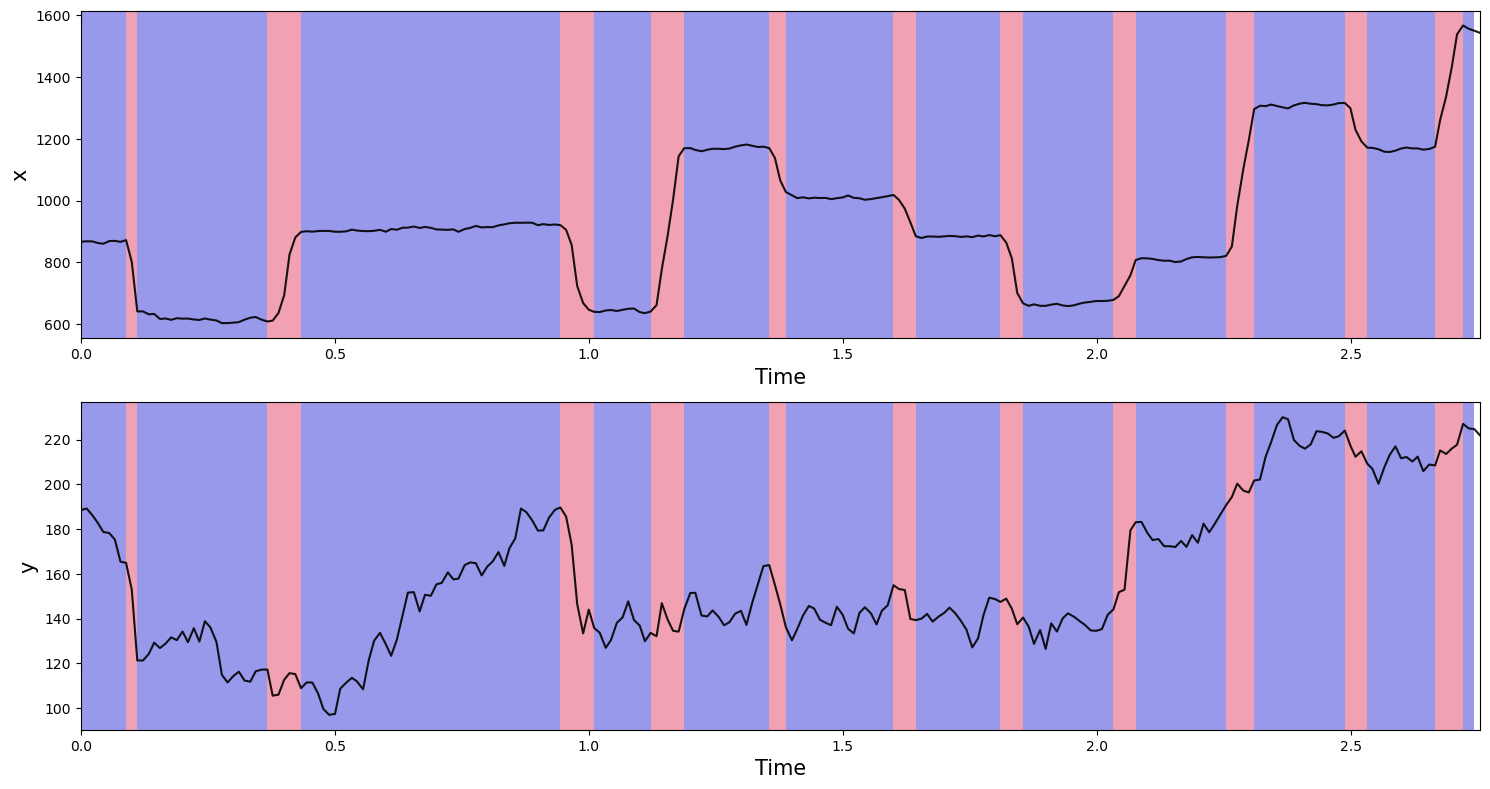

In [264]:
t = eyes['t']
x = eyes['x_right']
y = eyes['y_right']

classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
classifier.process()
classifier.plot()

In [265]:
skim_data = []
for i in range(len(skimming_parts)):
    part = i
    left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = skimming_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = skimming_parts[i].merge(fix, left_index=True, right_index=True)
    skim_data.append(round)


IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [266]:
skim_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-64.242302,80.498451,698.037476,-3.255834,83.458092,700.978943,0.630073,...,2.931061,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Skimming,1
1,0.012263,1,1,-64.203484,80.579979,698.027832,-3.255834,83.458092,700.978943,0.629994,...,2.931061,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Skimming,0
2,0.023928,1,1,-64.131058,80.664474,698.050964,-3.073437,83.571777,701.023010,0.629840,...,3.014832,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Skimming,0
3,0.034124,1,1,-63.993286,80.877487,698.315918,-2.726659,83.787178,701.446167,0.629505,...,3.074951,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Skimming,0
4,0.045332,1,1,-63.922230,80.983429,698.483765,-2.726659,83.787178,701.446167,0.629327,...,3.074951,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Skimming,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,3.298671,1,1,-60.718063,84.883942,702.144592,1.124316,84.836502,704.799194,0.622064,...,3.049515,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Skimming,0
291,3.310466,1,1,-60.675526,84.892433,702.247253,1.187746,84.840935,704.908875,0.621959,...,3.046661,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Skimming,1
292,3.321707,1,1,-60.624329,84.904449,702.329956,1.250230,84.834084,704.990906,0.621840,...,3.048218,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Skimming,1
293,3.331898,1,1,-60.515106,84.909317,702.404724,1.365823,84.797195,705.050232,0.621605,...,3.050400,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Skimming,1


In [267]:
im_data = []
for i in range(len(imerserive_parts)):
    part = i
    left_x = imerserive_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = imerserive_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = imerserive_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = imerserive_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = imerserive_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = imerserive_parts[i].merge(fix, left_index=True, right_index=True)
    im_data.append(round)

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [268]:
im_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-64.778465,96.119804,684.325623,-2.911061,101.302765,688.193542,0.633521,...,3.704987,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Immersive,0
1,0.009757,1,1,-64.664429,96.151085,684.360657,-2.758001,101.273628,688.227844,0.633275,...,3.693405,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Immersive,0
2,0.021185,1,1,-64.535042,96.218887,684.392700,-2.641781,101.259789,688.251831,0.632998,...,3.690964,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Immersive,0
3,0.031159,1,1,-64.262329,96.411781,684.392639,-2.419836,101.336929,688.223694,0.632425,...,3.688705,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Immersive,0
4,0.043155,1,1,-64.160805,96.501091,684.368713,-2.332475,101.415237,688.176636,0.632216,...,3.689575,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Immersive,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7491,83.505926,1,1,-60.772617,86.024529,697.640869,1.319080,86.065079,700.294067,0.622944,...,2.834152,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Immersive,0
7492,83.517772,1,1,-60.740597,85.843124,697.624451,1.267386,85.905678,700.277588,0.622884,...,2.851532,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Immersive,0
7493,83.528816,1,1,-60.728638,85.721664,697.692932,1.224462,85.805786,700.339478,0.622850,...,2.864227,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Immersive,0
7494,83.539057,1,1,-60.657291,85.336807,697.711182,1.088294,85.513359,700.343994,0.622707,...,3.003159,True,AI_HC_P03_text.txt,3.0,22.0,Arial,HC,False,Immersive,0


In [269]:
colunms_to_drop = ['Reading', 'text_file', 'passage_index', 'AI', 'Label']
for i in range(len(im_data)):
    im_data[i] = im_data[i].drop(columns = colunms_to_drop)
for i in range(len(skim_data)):
    skim_data[i] = skim_data[i].drop(columns = colunms_to_drop)

In [270]:
y_label = []
x_data = []
for i in range(len(im_data)):
    y_label.append("immersive")
    x_data.append(im_data[i])
for i in range(len(skim_data)):
    y_label.append("skimming")
    x_data.append(skim_data[i])

In [271]:
com_DF = pd.concat(x_data, ignore_index=True)

com_DF.to_csv(f'x_data_{testperson}.csv', index = False)
np.savetxt(f'y_label_{testperson}.csv', y_label, fmt='%s', delimiter=",")